In [ ]:
!pip install statsmodels --upgrade


     |████████████████████████████████| 9.5MB 7.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Assessment/mini_temp_data.csv",index_col=0,parse_dates=True)
X=df.values
print(df.head(15))
print(X.shape)

            temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8
1981-01-07  15.8
1981-01-08  17.4
1981-01-09  21.8
1981-01-10  20.0
1981-01-11  16.2
1981-01-12  13.3
1981-01-13  16.7
1981-01-14  21.5
1981-01-15  25.0
(3650, 1)


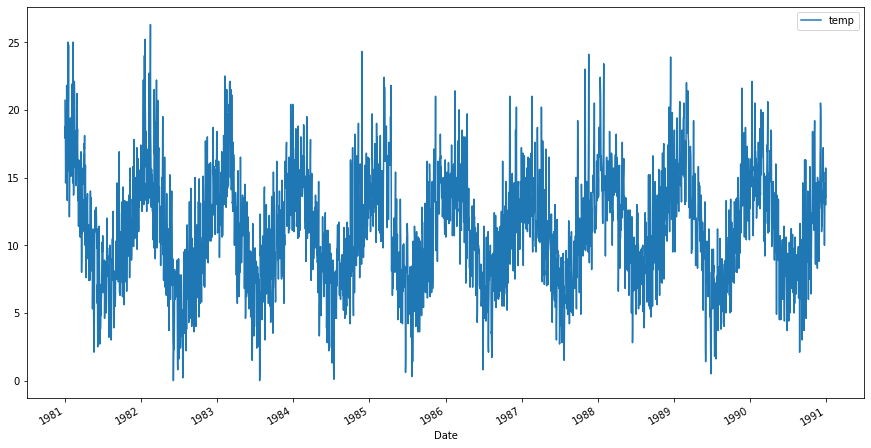

In [ ]:
df.plot(figsize=(15,8))


In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df["temp"], autolag="AIC")
print("1. ADF:", dftest[0])
print("2. P-value:", dftest[1])
print("3. Num of lags: ", dftest[2])
print("4. No of obsevations:", dftest[3])
print("5. critical values:", dftest[4])


1. ADF: -4.4448049246117
2. P-value: 0.0002470826300360994
3. Num of lags:  20
4. No of obsevations: 3629
5. critical values: {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}


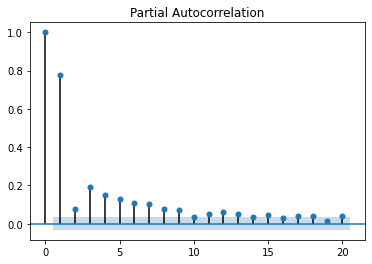

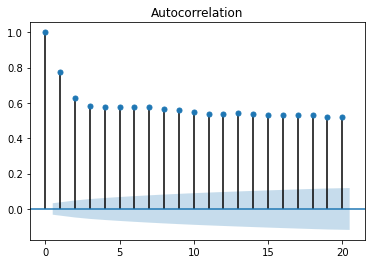

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf=plot_pacf(df["temp"],lags=20)
acf=plot_acf(df["temp"],lags=20)

In [ ]:
train=X[:len(X)-10]
test=X[len(X)-10:]
print(test)

[[13.2]
 [13.9]
 [10. ]
 [12.9]
 [14.6]
 [14. ]
 [13.6]
 [13.5]
 [15.7]
 [13. ]]


In [ ]:
model=AutoReg(train,lags=10).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3640
Model:                    AutoReg(10)   Log Likelihood               -8368.819
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Thu, 08 Jul 2021   AIC                              1.780
Time:                        09:01:54   BIC                              1.800
Sample:                            10   HQIC                             1.787
                                 3640                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9333      0.142      6.590      0.000       0.656       1.211
y.L1           0.6104      0.017     36.796      0.000       0.578       0.643
y.L2          -0.0833      0.019     -4.289      0.000      -0.121      -0.045
y.L3           0.0628      0.019      3.229      0.001       0.025       0.101
y.L4           0.0517      0.019      2.655      0.008       0.014       0.090
y.L5           0.0543      0.019      2.786      0.005       0.016       0.092
y.L6           0.0430      0.019      2.208      0.027       0.005       0.081
y.L7           0.0587      0.019      3.015      0.003       0.021       0.097
y.L8           0.0324      0.019      1.666      0.096      -0.006       0.071
y.L9           0.0503      0.019      2.589      0.010       0.012       0.088
y.L10          0.0359      0.017      2.165      0.030       0.003       0.068
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0275           -0.0000j            1.0275           -0.0000
AR.2             0.9810           -0.7940j            1.2620           -0.1083
AR.3             0.9810           +0.7940j            1.2620            0.1083
AR.4             0.4192           -1.3008j            1.3667           -0.2004
AR.5             0.4192           +1.3008j            1.3667            0.2004
AR.6            -0.4351           -1.3904j            1.4568           -0.2983
AR.7            -0.4351           +1.3904j            1.4568            0.2983
AR.8            -1.3043           -0.8685j            1.5671           -0.4065
AR.9            -1.3043           +0.8685j            1.5671            0.4065
AR.10           -1.7502           -0.0000j            1.7502           -0.5000
------------------------------------------------------------------------------
"""

In [ ]:
predict=model.predict(len(train),len(X)-1)
print(predict)

[13.06409837 13.34334141 13.52346812 13.66520309 13.64021516 13.67473529
 13.6101648  13.4642927  13.32168527 13.18457529]


[[13.2]
 [13.9]
 [10. ]
 [12.9]
 [14.6]
 [14. ]
 [13.6]
 [13.5]
 [15.7]
 [13. ]]


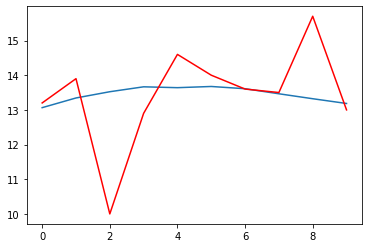

In [ ]:
plt.plot(predict)
plt.plot(test,color='red')
print(test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error=sqrt(mean_squared_error(test,predict))
print(error)

1.4158923959722587


In [ ]:
predict_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("the predicts are:/n", predict_future)

the predicts are:/n [13.10849995 13.08946242 13.05597028 13.00958285 12.95779002 12.90115071
 12.84421563]


In [ ]:
from statsmodels.tsa.arima_model import ARMA
model_ma=ARMA(df.temp, order=(2,2),)
model_ma=model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   temp   No. Observations:                 3650
Model:                     ARMA(2, 2)   Log Likelihood               -8384.568
Method:                       css-mle   S.D. of innovations              2.406
Date:                Thu, 08 Jul 2021   AIC                          16781.136
Time:                        09:01:55   BIC                          16818.351
Sample:                             0   HQIC                         16794.389
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4839      0.861     13.332      0.000       9.796      13.172
ar.L1.temp     1.2365      0.038     32.790      0.000       1.163       1.310
ar.L2.temp    -0.2421      0.037     -6.502      0.000      -0.315      -0.169
ma.L1.temp    -0.6455      0.037    -17.416      0.000      -0.718      -0.573
ma.L2.temp    -0.2306      0.030     -7.700      0.000      -0.289      -0.172
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0074           +0.0000j            1.0074            0.0000
AR.2            4.1002           +0.0000j            4.1002            0.0000
MA.1            1.1094           +0.0000j            1.1094            0.0000
MA.2           -3.9090           +0.0000j            3.9090            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
predict_ma=model_ma.predict(len(train),len(X)-1)
print(predict_ma)

Date
1990-12-22    13.301452
1990-12-23    13.676218
1990-12-24    13.934930
1990-12-25    11.552667
1990-12-26    13.631745
1990-12-27    14.058468
1990-12-28    13.655201
1990-12-29    13.540485
1990-12-30    13.503417
1990-12-31    14.800456
dtype: float64


In [ ]:
print(test)

[[13.2]
 [13.9]
 [10. ]
 [12.9]
 [14.6]
 [14. ]
 [13.6]
 [13.5]
 [15.7]
 [13. ]]


In [ ]:
#Moving Average

df["MA_1"]=df['temp'].rolling(window=4).mean()
print(df["MA_1"])

Date
1981-01-01       NaN
1981-01-02       NaN
1981-01-03       NaN
1981-01-04    18.000
1981-01-05    16.775
               ...  
1990-12-27    12.875
1990-12-28    13.775
1990-12-29    13.925
1990-12-30    14.200
1990-12-31    13.950
Name: MA_1, Length: 3650, dtype: float64


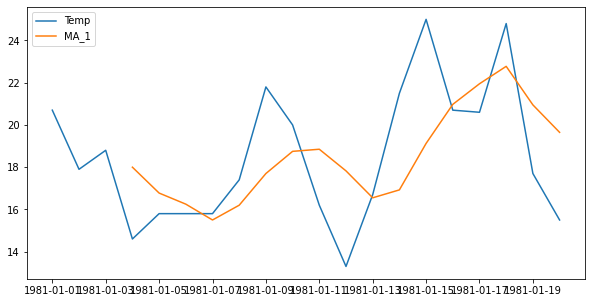

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.temp[:20],label='Temp')
plt.plot(df.MA_1[:20],label='MA_1')
plt.legend(loc=2)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error=sqrt(mean_squared_error(test,predict_ma))
print(error)

1.6239332603467753
